In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./fuelDs.csv')
df=data
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [5]:
# Pick only the numeric columns
numeric_data = data.select_dtypes(include=[np.number]) #.drop(columns=['Year'])

# Correlation matrix
corr = numeric_data.corr()

print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                  Year  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
Year               NaN          NaN        NaN               NaN           NaN
ENGINE SIZE        NaN     1.000000   0.893819          0.858170      0.849714
CYLINDERS          NaN     0.893819   1.000000          0.825784      0.798447
FUEL CONSUMPTION   NaN     0.858170   0.825784          1.000000      0.983232
COEMISSIONS        NaN     0.849714   0.798447          0.983232      1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS ']]
y = data['FUEL CONSUMPTION']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_r2_score = r2_score(y_train, train_predictions)
test_r2_score = r2_score(y_test, test_predictions)

print("R-squared score of LR model on training data:", train_r2_score)
print("R-squared score of LR model on testing data:", test_r2_score)

R-squared score of LR model on training data: 0.9659623172703437
R-squared score of LR model on testing data: 0.9843927717503074


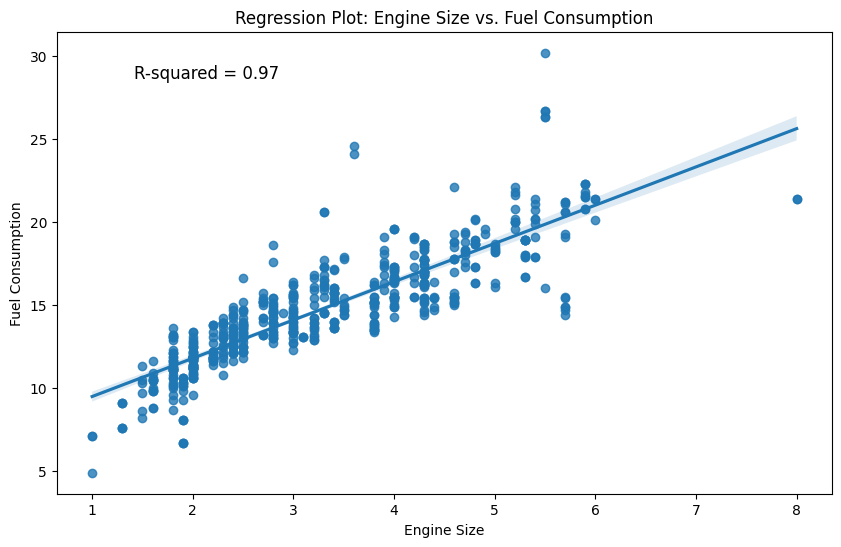

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ENGINE SIZE', y='FUEL CONSUMPTION', data=data)
plt.title('Regression Plot: Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption')
plt.annotate(f'R-squared = {r2_score_value:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.show()